In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("liver_cirrhosis.csv")
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [5]:
le=LabelEncoder()
df['Status']=le.fit_transform(df['Status'])
df['Drug']=le.fit_transform(df['Drug'])
df['Sex']=le.fit_transform(df['Sex'])
df['Ascites']=le.fit_transform(df['Ascites'])
df['Hepatomegaly']=le.fit_transform(df['Hepatomegaly'])
df['Spiders']=le.fit_transform(df['Spiders'])
df['Edema']=le.fit_transform(df['Edema'])
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,0,1,19724,1,1,0,1,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,0,1,11839,0,0,0,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,2,1,16467,0,0,0,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,2,1,21699,0,0,1,0,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,2,0,16736,0,0,1,1,2,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,0,0,16990,0,0,1,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [6]:
x=df.iloc[:,:-1]
y=df['Stage']
print(x)
print(y)

       N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0        2221       0     1  18499    0        0             1        0   
1        1230       0     1  19724    1        1             0        1   
2        4184       0     1  11839    0        0             0        0   
3        2090       2     1  16467    0        0             0        0   
4        2105       2     1  21699    0        0             1        0   
...       ...     ...   ...    ...  ...      ...           ...      ...   
24995    3584       2     0  23612    0        0             0        0   
24996    3584       2     0  23612    0        0             0        0   
24997     971       2     0  16736    0        0             1        1   
24998    3707       0     0  16990    0        0             1        0   
24999    3707       0     0  16990    0        0             1        0   

       Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0          0        0.5 

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [9]:
y_pred=model.predict(x_test)

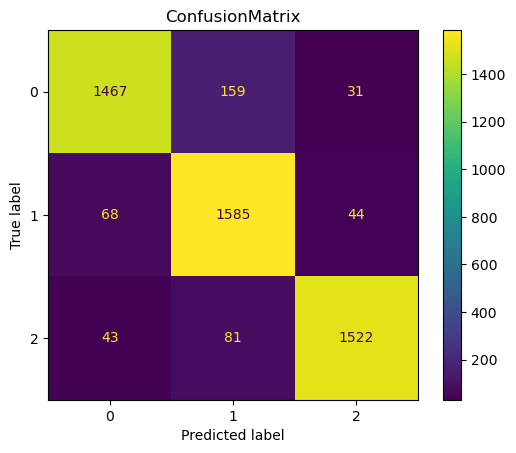

In [10]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("ConfusionMatrix")
plt.show()

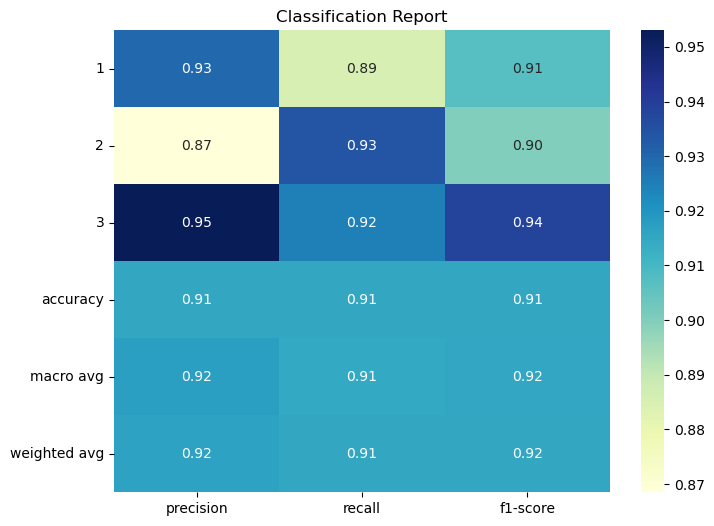

In [11]:
cr=classification_report(y_test,y_pred,output_dict=True)
report_df = pd.DataFrame(cr).transpose()
report_df = report_df.drop(columns=['support'])
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()